In [1]:
#imports
import pandas as pd
import panel as pn
import matplotlib.pyplot as plt
import numpy as np
import folium as fl
import seaborn as sns

pn.extension()

# intro

The purpose of this project is to create a data dashboard suited for interactivity and visually representing zooarchelogical data for our client.

# about the data

The data for this project concerns a dataset acquired from [opencontext.org](https://opencontext.org/) specifically one that our client, [Sarah Whitcher Kansa](https://opencontext.org/about/people), contributed to. The dataset we begin with is the [Domuztepe Excavations](https://opencontext.org/projects/e6fb0f7c-6f69-6ca8-683b-8c6d5e98a099) dataset, this dataset contains the objects and zooarcheological features found at the Domuztepe Excavation site. The dataset contains a variety of data about these objects including the wgs formatted coordinates the object was found at, the dating, the item category and many more such things.

The reason this particular dataset was chosen was the contribution of the client of this project and the present data varity compared to other datasets I was able to find on [opencontext](https://opencontext.org/). As of the writing of this my contact person has not had contact with our client yet but has stated that he is in the process of contacting our client. So after consulting with the contact person I have gained approval for developement of the data dashboard using this dataset.

After further discussion with my contact person we have decided to continue with the [EOL Computational Data Challenge: Primary Zooarchaeology Dataset](https://opencontext.org/tables/f07bce4f-b08c-fe92-6505-c9e534d89a09). We chose this dataset because the client is a contributor towards it and because of the increased variety of data within this dataset compared to the [Domuztepe Excavations](https://opencontext.org/projects/e6fb0f7c-6f69-6ca8-683b-8c6d5e98a099) dataset.

# data exploration

After loading in the data with pandas using the code below we can explore the composition of the data with some matplotlib visualisations and the built in functions that pandas offers.

In [2]:
def read_dataframe(dataframe_filepath):
    df = pd.read_csv(dataframe_filepath, low_memory=False)
    return df

df = read_dataframe("~/Downloads/f07bce4f-b08c-fe92-6505-c9e534d89a09--v1--full.csv")

If we look at the results of the built in pandas methods below we can for example conclude that that the dataset is mostly composed of qualitative clasiffication data and the a small portion of chronological classification data. This limits the amount of statistical tests that can be performed upon this dataset. 

In [3]:
# pandas built in description methods
print("shape of dataframe: ",df.shape)
print("dataframe description pandas\n", df.describe())
print("head of the dataframe",df.head())


shape of dataframe:  (239320, 37)
dataframe description pandas
        Latitude (WGS-84)  Longitude (WGS-84)  Early Date (BCE/CE)  \
count      239320.000000       239320.000000        239320.000000   
mean           38.141062           32.037922         -6929.720416   
std             1.068267            2.014077          2372.061231   
min            37.077589           27.350000        -17850.000000   
25%            37.668196           30.579436         -6500.000000   
50%            37.668196           32.827191         -6500.000000   
75%            37.847790           32.827191         -6200.000000   
max            40.468303           37.043999         -2400.000000   

       Late Date (BCE/CE)  
count       239320.000000  
mean         -6421.029458  
std           1824.722781  
min         -17050.000000  
25%          -6200.000000  
50%          -6200.000000  
75%          -5700.000000  
max          -2000.000000  
head of the dataframe                                         

![output of the dataframe shape property and the dataframe description method from pandas](media/image%20copy%202.png)

Considering the code and figure 1 below we can see that the columns context 6, context 7, context 8, context 9 and al the columns related to fusion character and physiological sex determination consist of little actual data and are instead largely coposed of N/A-like values. However due to the smal portion of valid values contained within these columns I will leave all of these columns except for geospatial note within the dataset so that the end user can independantly decide if they want to include these columns within their dashboard or not.

In [4]:
def count_na_and_actual_values() -> pd.DataFrame:
    """calculate counts of N/A-like and actual values for each column"""
    na_counts = {}
    actual_counts = {}

    for column in df.columns:
        na_count = df[column].isna().sum() + df[column].isin(['NaN', 'N/A', 'unknown', "indeterminate", "nan",
                "Best available location data", 
                "Area Not recorded", "Level ?",
                  "Area [Not indicated]","Bag  Not recorded",
                  "Bag  383?", "Level Not recorded","NaN",
                  "Strat Group [??]", "Strat Group [?]",
                  "Strat Group [???]", "(Context Unknown)", 
                  "Unit [Not indicated]", "Unit 32(?)"]).sum()
        actual_count = len(df[column]) - na_count
        na_counts[column] = na_count
        actual_counts[column] = actual_count

    return na_counts, actual_counts

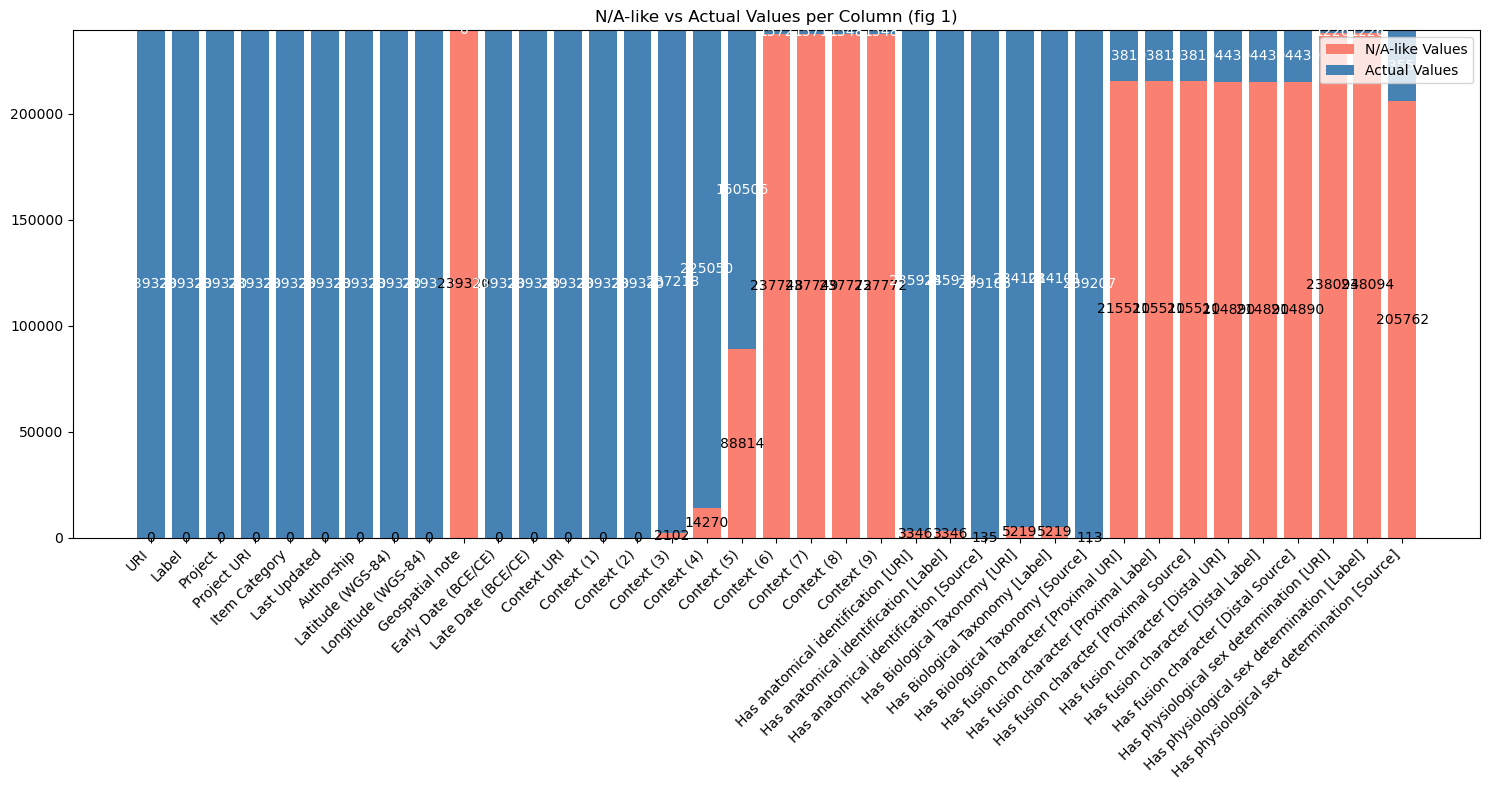

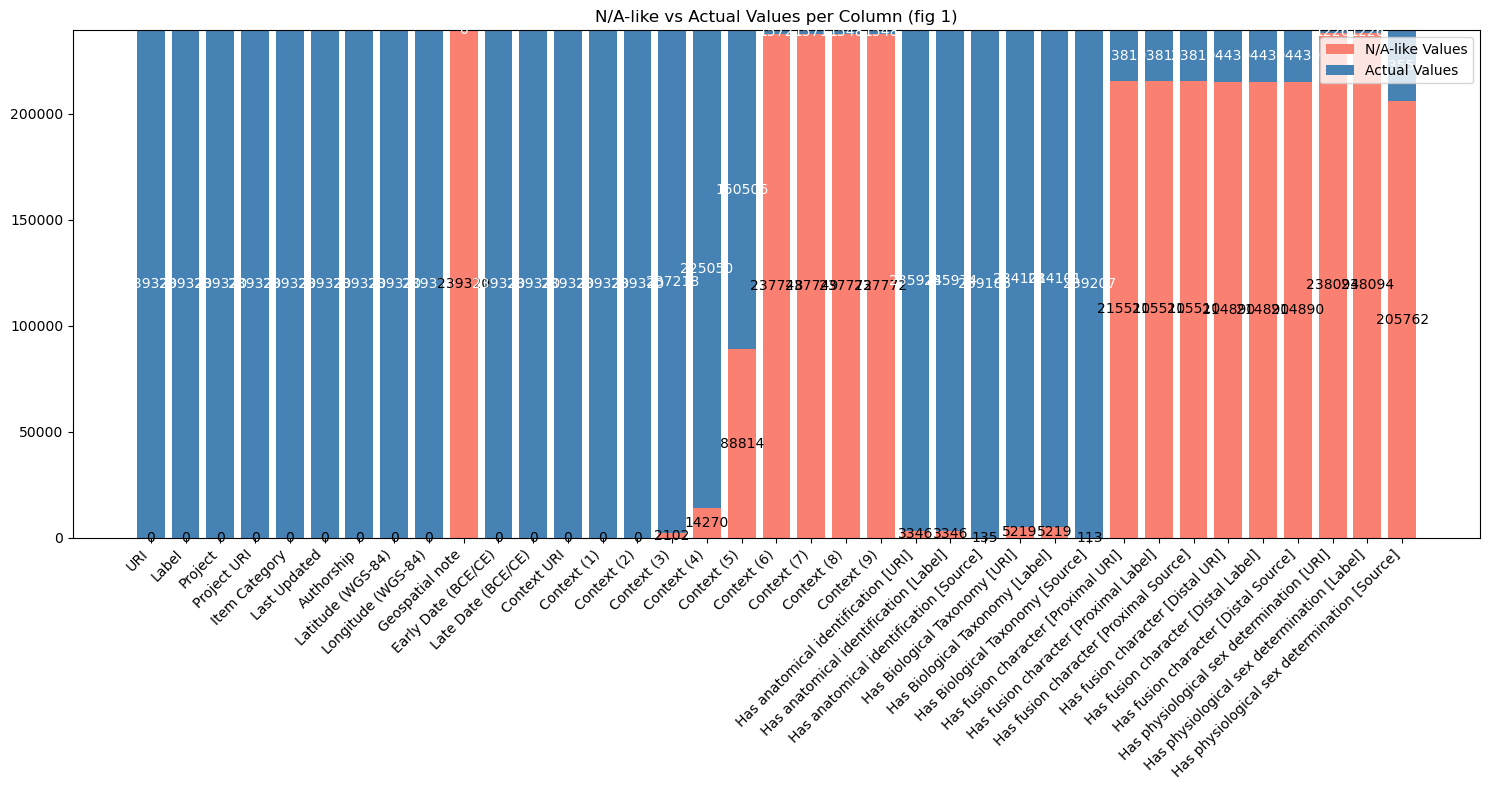

In [5]:
def create_na_values_fig_panel():
    """create plot N/A- value distribution"""

    # N/A-ish values distribution
    na_counts, actual_counts = count_na_and_actual_values()
    fig, ax = plt.subplots(figsize=(15, 8))
    index = np.arange(len(na_counts))
    ax.bar(index, na_counts.values(), label='N/A-like Values', color='salmon')
    ax.bar(index, actual_counts.values(), bottom=list(na_counts.values()), label='Actual Values', color='steelblue')
    ax.set_xticks(index)
    ax.set_xticklabels(df.columns ,ha="right" ,va="top" ,rotation=45)
    ax.set_title("N/A-like vs Actual Values per Column (fig 1)")
    plt.legend()

    # add labels to indicate the hard numbers if the bars
    for bar_index, (na, actual) in enumerate(zip(na_counts.values(), actual_counts.values())):
        ax.text(
            x=bar_index, y=na / 2, s=str(na), ha='center', va='center', fontsize=10, color='black'
        )
        ax.text(
            x=bar_index, y=na + actual / 2, s=str(actual), ha='center', va='center', fontsize=10, color='white'
        )
    plt.tight_layout()
    return plt.gcf()
create_na_values_fig_panel()

![na values distribution plot](media/image.png)

When looking at the code and the accompanying figure 2 below we can see the distribution of unique values within the dataset. From this can be concluded that columns that almost wholly consist (such as URI and Label) of unique values are not useful for the statisctical analysis of this dataset. Despite this they still have value to the dataset, as the Labels serve their intended purpose of being identifiers for the ietems within this dataset and the URI serves as a provider of additional context not contained within the dataset.

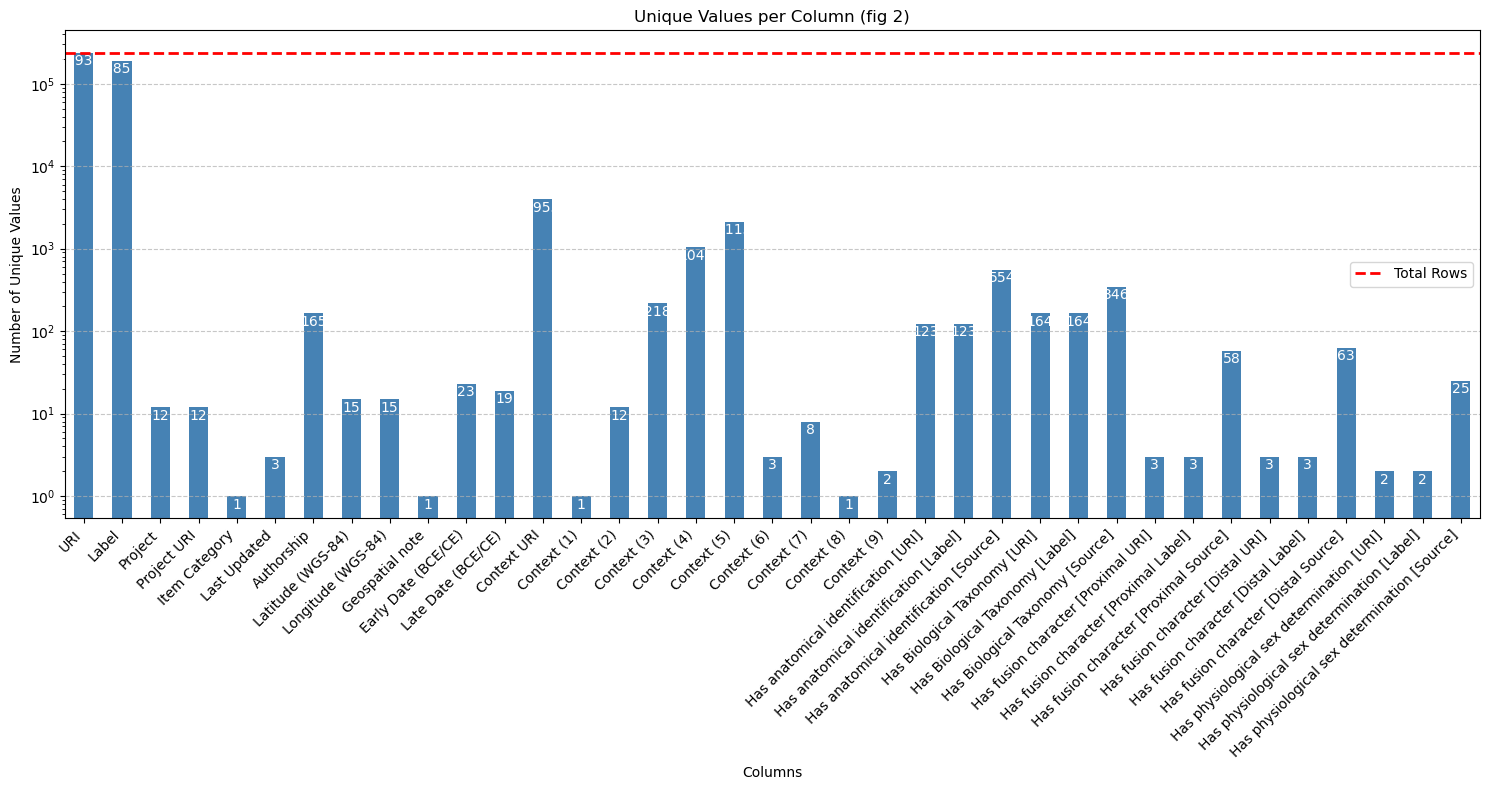

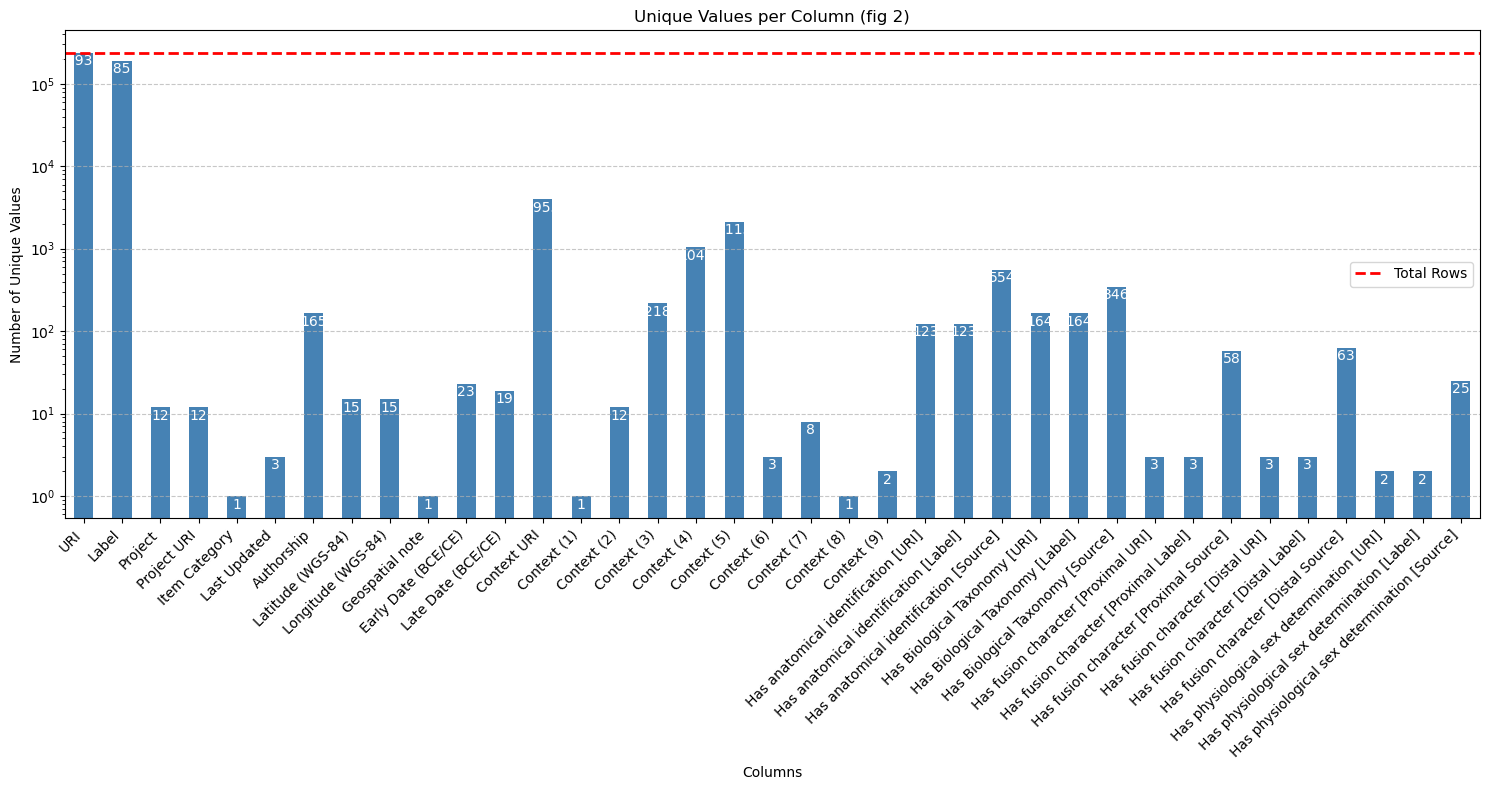

In [6]:
def create_unique_values_fig_panel():
        """create a plot to display the unique values distributed over the dataframe"""
        plt.close('all') # close all previous figures

        unique_counts = df.nunique()
        plt.figure(figsize=(15, 8))
        unique_counts.plot(kind='bar', color='steelblue')
        plt.xlabel("Columns")
        plt.ylabel("Number of Unique Values")
        plt.title("Unique Values per Column (fig 2)")
        plt.xticks(ticks=range(len(unique_counts.index)),
                    ha="right",
                      va="top",
                        labels=unique_counts.index,
                          rotation=45)
        plt.yscale('log')
        plt.axhline(y=239320, color='red', linestyle='--', linewidth=2, label='Total Rows')
        # add labels to indicate the hard numbers if the bars
        for bar_index, value in enumerate(unique_counts):
            plt.text(
                x=bar_index, y=value - (value*0.35), s=str(value), ha='center', va='bottom', fontsize=10, color="white"
                    )
        plt.legend()
        # txt="I need the caption to be present a little below X-axis"
        # plt.figtext(0.5, 0.01, txt, wrap=True, horizontalalignment='center', fontsize=12)
        plt.grid(axis='y', linestyle='--', alpha=0.7)
        plt.tight_layout()
        return plt.gcf()

create_unique_values_fig_panel()


![unique values per column figure](media/image%20copy.png)

In [7]:

df['Early Date (BCE/CE)'] = pd.to_numeric(df['Early Date (BCE/CE)'])
df['Late Date (BCE/CE)'] = pd.to_numeric(df['Late Date (BCE/CE)'])

/usr/bin/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


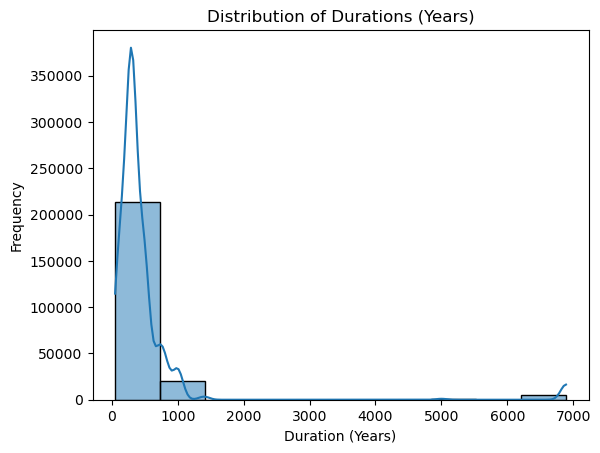

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate duration
df['duration'] = df['Late Date (BCE/CE)'] - df['Early Date (BCE/CE)']

# Plot histogram
sns.histplot(df['duration'], bins=10, kde=True)
plt.title('Distribution of Durations (Years)')
plt.xlabel('Duration (Years)')
plt.ylabel('Frequency')
plt.show()

In [9]:
import plotly.express as px

# Add row identifiers
df['Event'] = df.index + 1

# Create Gantt chart
fig = px.timeline(
    df,
    x_start='Early Date (BCE/CE)',
    x_end='Late Date (BCE/CE)',
    y='Event',
    title='Gantt Chart of Date Ranges (BCE/CE)',
    labels={'Event': 'Event ID'}
)
fig.update_xaxes(title='Year (BCE/CE)', tickmode='linear')
fig.show()

TypeError: Object of type timedelta is not JSON serializable

In the code and figure 4 and 5 below we can see that the distribution of early and late dates is largely linearly consistent over the whole dataset, given the source of this dataset I personally contribute this to the stable periodization of the authors of this dataset.

ValueError: Unknown format code 'd' for object of type 'float'

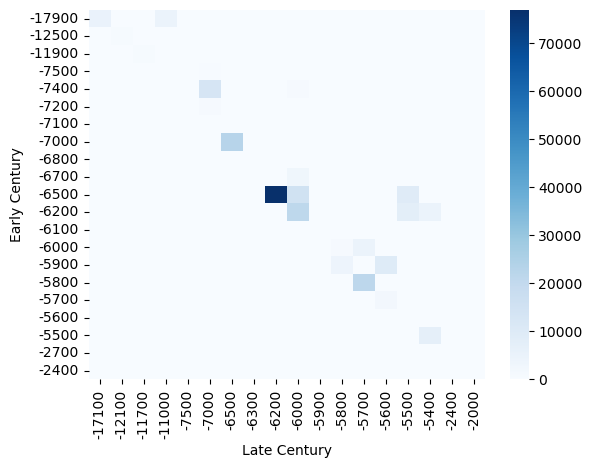

In [ ]:
import seaborn as sns

# divide dates into 100year intervals
df['Early Century'] = (df['Early Date (BCE/CE)'] // 100).astype(int) * 100
df['Late Century'] = (df['Late Date (BCE/CE)'] // 100).astype(int) * 100

# Count events by centuries
counts = df.groupby(['Early Century', 'Late Century']).size().reset_index(name='count')

# Pivot table for heatmap
heatmap_data = counts.pivot_table(index='Early Century', columns='Late Century', values='count', fill_value=0)

# Plot the heatmap
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt="d")

# Set the title and labels
plt.suptitle('Event Counts by Century (BCE/CE) figure 4', fontsize=16, y=1.05)
plt.xlabel('Late Century')
plt.ylabel('Early Century')

# Invert the Y-axis so that the century starts from 0 at the top
plt.gca().invert_yaxis()

# Set the limits of the Y-axis explicitly, if necessary
plt.gca().set_ylim(heatmap_data.index.max() + 1, heatmap_data.index.min() - 1)

# Show the plot
plt.show()

![heatmap of the dates in 100 year intervals, figure 4](media/image%20copy%203.png)

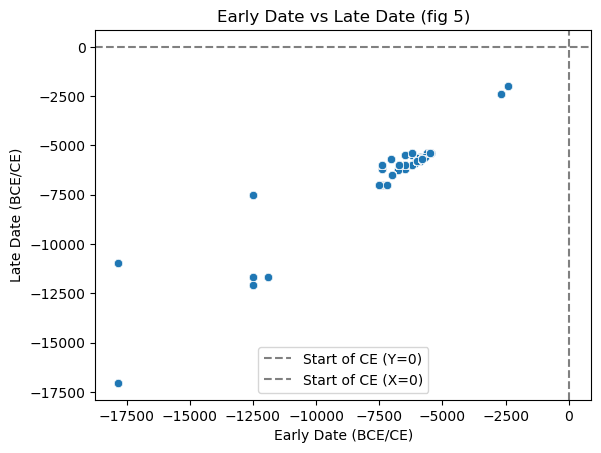

In [ ]:
sns.scatterplot(
    x='Early Date (BCE/CE)',
    y='Late Date (BCE/CE)',
    data=df
)
plt.axhline(0, color='gray', linestyle='--', label='Start of CE (Y=0)')
plt.axvline(0, color='gray', linestyle='--', label='Start of CE (X=0)')
plt.title('Early Date vs Late Date (fig 5)')
plt.xlabel('Early Date (BCE/CE)')
plt.ylabel('Late Date (BCE/CE)')
plt.legend()
plt.show()

![scatter plot displaying all theearly and late date datapoints](media/image%20copy%204.png)

# statistical analysis

due to the inconsistent syntax within the date and the great amount of missing values proportionate to the total number of rows I have chosen not to perform an indepth statistical analysis on this dataset.

# conclusion

In conclusion of all my findings in regards of this dataset I will not be performing more than the most basic visualisations


# developement of the app

For the developement of this app we will be using the python language and primarily the panel package for the construction of our dashboard. But all the used packages are too much to discuss each individually and as such I will display all the used packages for this project in the table below along with their versions and intended uses for this project.

|package name|version|intended use|
|---|---|---|
|panel|1.3.8|the visual construction of our data dashboard and interactive components for the end user|
|pandas|2.1.4|data manipulation (filtering)|
|numpy|1.26.4|calculations on the largescale data|

